# PARTIE 1 :  Analyse descriptive des bases et visualisation 


## Description classiques des données: 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
pd.set_option('display.max_columns', None) 
   
chemin_actuel = os.getcwd()

# Afficher le répertoire de travail actuel
print("Chemin actuel:", chemin_actuel)
os.chdir("../modules") #allons dans nos modules

import data_clean as dc

fusion= dc.fusion
A_categories=dc.fusion
A_products=dc.fusion

Chemin actuel: /Users/ghorafimanal/Documents/M1/Projet py/Code_Principal
id               0
category_name    0
dtype: int64
asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64
1206102    https://www.amazon.com/dp/B00758A9CE
Name: producturl, dtype: object
asin                                                        B00758A9CE
title                carlisle foodService products 3646875 flo-thru...
imgurl               https://m.media-amazon.com/images/I/71+50RU8o2...
producturl                        https://www.amazon.com/dp/B00758A9CE
stars                                                              5.0
reviews                                                              0
price                                                            33.08
listprice                        

In [2]:
def description(df):
    print("Le fichier possède {} observations et {} variables"\
          .format(df.shape[0], df.shape[1]))
    print("\nVoici les différentes colonnes du dataframe: ")
    print(df.columns)
    print("\nVoici les noms et types de variables :")
    print(df.dtypes)
    return

description(A_categories)
description(A_products)

Le fichier possède 1426337 observations et 12 variables

Voici les différentes colonnes du dataframe: 
Index(['asin', 'title', 'imgurl', 'producturl', 'stars', 'reviews', 'price',
       'listprice', 'category_id', 'isbestseller', 'boughtinlastmonth',
       'category_name'],
      dtype='object')

Voici les noms et types de variables :
asin                  object
title                 object
imgurl                object
producturl            object
stars                float64
reviews                int64
price                float64
listprice            float64
category_id            int64
isbestseller            bool
boughtinlastmonth      int64
category_name         object
dtype: object
Le fichier possède 1426337 observations et 12 variables

Voici les différentes colonnes du dataframe: 
Index(['asin', 'title', 'imgurl', 'producturl', 'stars', 'reviews', 'price',
       'listprice', 'category_id', 'isbestseller', 'boughtinlastmonth',
       'category_name'],
      dtype='object')


In [3]:
def stats_descrip(df):
    return df.describe()

stats_descrip(A_products)

,stars,reviews,price,listprice,category_id,boughtinlastmonth
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05


## Réponses aux questions :


#### Question 1 :  
Quels sont les 10 articles ayant le plus d’avis ? Afficher graphiquement leur note moyenne respective par ordre décroissant.


                       reviews         category_name
title                                               
essence | lash          346563                makeup
thisworx cordless car   292474     vacuum cleaners &
queen size sheet        281661      kids' home store
full size sheet         281661      kids' home store
queen size sheet        281661      kids' home store
blink mini –            260659  smart home: security
maybelline new york     194051                makeup
schick hydro silk       183726        shaving & hair
roku express |          177760   televisions & video
boat airdopes 141       174524  headphones & earbuds


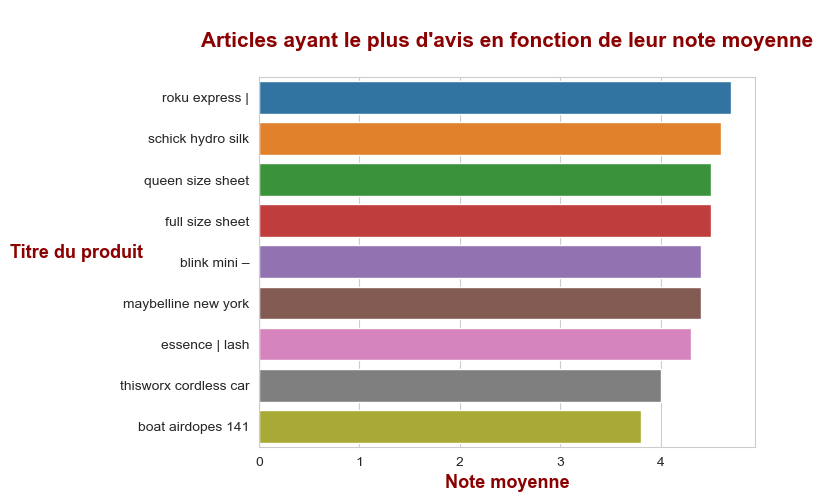

In [4]:
ByReviews=fusion.sort_values(by="reviews",ascending=(False))
ByReviews['category_name'] = ByReviews['category_name'].str.split().str.slice(0, 3).str.join(' ')
ByReviews['title'] = ByReviews['title'].str.split().str.slice(0, 3).str.join(' ')

#on affiche les 10 premieres lignes des articles ('title') en fonctions des avis ('reviews') décroissants (rangés dans la variable A) 
BestBR=ByReviews[['title','reviews','category_name']]
BestBR=BestBR.set_index('title')
print(BestBR.head(10))

#Afficher graphiquement leur note moyenne respective par ordre décroissant.
Note_moyenne = ByReviews.head(10).sort_values(by="stars",ascending=(False))

sns.set_style("whitegrid") #pour avoir un fond gris quadrillé
sns.barplot(x='stars', y='title', data=Note_moyenne)
plt.title("\nArticles ayant le plus d'avis en fonction de leur note moyenne\n", fontsize=15, fontweight='bold', color='darkred')
plt.xlabel("Note moyenne", fontsize=13, fontweight='bold', color='darkred')
plt.ylabel("Titre du produit               ", fontsize=13, fontweight='bold', color='darkred',rotation=0)
plt.show()

#### Question 2 :  
Calculer le prix moyen des produits par catégorie. Afficher graphiquement les prix moyens pour les 15 catégories les plus chères

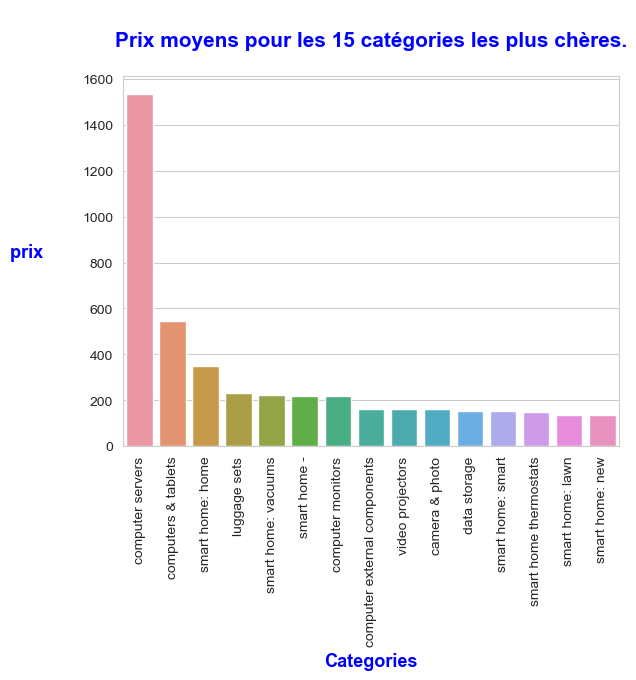

In [5]:

merge = fusion.groupby(["category_id","category_name"]).agg({'price': 'mean'}).reset_index()
merge=merge.set_index('category_id')
merge['category_name'] = merge['category_name'].str.split().str.slice(0, 3).str.join(' ')
merge = merge.sort_values(by="price",ascending=(False))  


sns.barplot(x="category_name",y='price', data=merge.head(15))
plt.xticks(rotation='vertical')  
plt.ylabel("prix                    ", fontsize=13, fontweight='bold', color='blue',rotation=0)
plt.title("\nPrix moyens pour les 15 catégories les plus chères.\n", fontsize=15, fontweight='bold', color='blue')
plt.xlabel("Categories", fontsize=13, fontweight='bold', color='blue')
plt.show()


#### Question 3 :  
Quels sont les produits Best Seller ayant une note inférieure à 4/5 ? Afficher la distribution des prix pour ces produits.
Quels sont les 5 qui ont été le plus vendus ? Combien d’unités ?


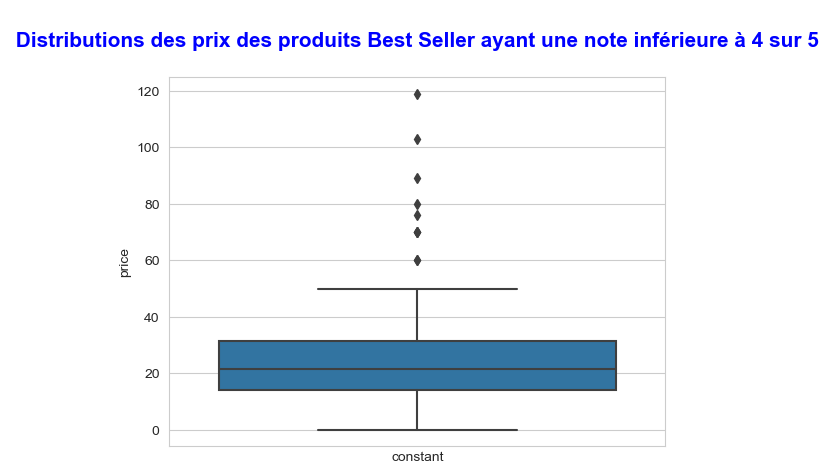

In [11]:
trois = fusion.loc[(fusion["isbestseller"] == True) & (fusion["stars"] < 4)].reset_index()
trois['title'] = trois['title'].str.split().str.slice(0, 3).str.join(' ')

# Création d'une boite à moustache pour l'ensemble des prix
sns.boxplot(x='constant', y='price', data=trois.assign(constant=1))

# Supprimer les ticks de l'axe x
plt.xticks([])

# Ajouter un titre
plt.title("\n Distributions des prix des produits Best Seller ayant une note inférieure à 4 sur 5 \n", fontsize=15, fontweight='bold', color='blue')

# Afficher le graphique
plt.show()


In [7]:
trois=trois.sort_values(by="boughtinlastmonth",ascending=(False))
T=trois.head(5).set_index('title') ## les 5 qui ont été le plus vendus
print(T[["boughtinlastmonth"]]) ##l'article et le nombre d'unités vendus

                       boughtinlastmonth
title                                   
hismile v34 colour                100000
super mario bros.™                 20000
nad's facial wax                   20000
pure instinct roll-on              20000
hair catcher durable               20000


#### Question 4:  
Existe-t-il un lien entre la note d’un produit et les autres critères présents dans les données ?




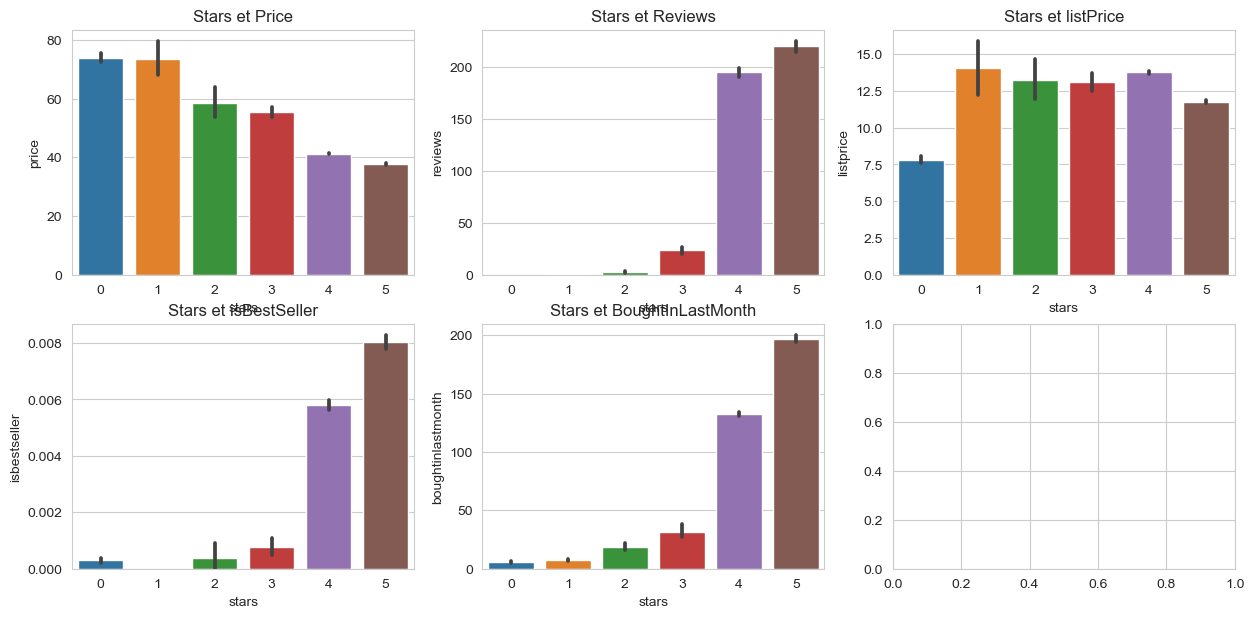

In [8]:
fusionS=fusion

fusionS['stars'] = fusionS['stars'].round().astype(int)

# Créer une seule figure et plusieurs sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

# Tracer les barplots sur les sous-graphiques spécifiques
sns.barplot(x='stars', y='price', data=fusionS, ax=axes[0, 0])
axes[0, 0].set_title('Stars et Price')

sns.barplot(x='stars', y='reviews', data=fusionS, ax=axes[0, 1])
axes[0, 1].set_title('Stars et Reviews')

sns.barplot(x='stars', y='isbestseller', data=fusionS, ax=axes[1, 0])
axes[1, 0].set_title('Stars et isBestSeller')

sns.barplot(x='stars', y='boughtinlastmonth', data=fusionS, ax=axes[1, 1])
axes[1, 1].set_title('Stars et BoughtInLastMonth')

sns.barplot(x='stars', y='listprice', data=fusionS, ax=axes[0, 2])
axes[0, 2].set_title('Stars et listPrice')

plt.show()